In [1]:
%pylab inline
import pandas as pd
import scipy.stats as stats
import seaborn as sns
sns.set_style('white')

rcParams['font.size']=12
rcParams['pdf.fonttype']=42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

Populating the interactive namespace from numpy and matplotlib


In [2]:
FC_FILE="FC_TABLE_Avana_ACH-001306"

In [3]:
FC_DATA = pd.read_csv(FC_FILE,sep="\t",index_col=0)
FC_DATA.head(3)

,GENE,8305C-311cas9_RepA_p5_batch3,8305C-311cas9_RepB_p5_batch3
ACGCCAACTGGCTCACCGAA,OR4F5,0.261515,-0.264114
CTCCTTCTTCAGGTTCCGGG,SAMD11,0.024335,0.175057
TGCCTCTCTGGAATTCACAG,SAMD11,-0.308314,-0.090244


### Sample: 8305C-311cas9_RepA_p5_batch3
Quality Score(Cohen's D) = 1.3


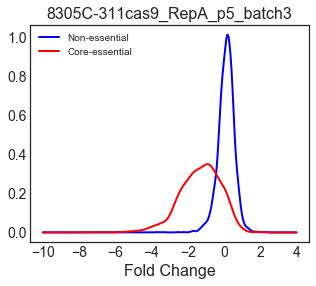

### Sample: 8305C-311cas9_RepB_p5_batch3
Quality Score(Cohen's D) = 1.3


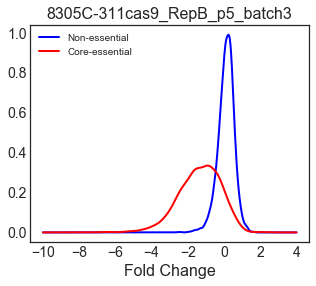

In [4]:
ess = pd.read_table('CEGv2_idupdated.txt', index_col=0)  # load ref_core-essential
non = pd.read_table('NEGv1_idupdated.txt', index_col=0)  # load ref_non-essential
essidx = FC_DATA[FC_DATA['GENE'].isin(ess.index.values)].index 
nonidx = FC_DATA[FC_DATA['GENE'].isin(non.index.values)].index
xx = linspace(-10,4,500)

for i in range(1, len(FC_DATA.dtypes)):

    sample = FC_DATA.columns.values[i]
   
    kess = stats.gaussian_kde( FC_DATA.loc[essidx,sample])
    knon = stats.gaussian_kde( FC_DATA.loc[nonidx,sample])
    
    figure( figsize(5,4))
    plot( xx, knon.evaluate(xx), c='b', linewidth=2, label='Non-essential')
    plot( xx, kess.evaluate(xx), c='r', linewidth=2, label='Core-essential')
    print(f"### Sample: {sample}")

    cohensd = (mean(FC_DATA.loc[nonidx,sample]) - mean(FC_DATA.loc[essidx,sample])) / std(FC_DATA.loc[essidx,sample].tolist() + FC_DATA.loc[nonidx,sample].tolist())
    print (f"Quality Score(Cohen's D) = {cohensd:.3g}")  # -2.0 < QS < 2.0, QS > 1.0 is a good sample.
    
    legend(loc='best')
    xlabel('Fold Change',fontsize=16)
    xticks(size=14)
    yticks(size=14)
    title(sample,fontsize=16)
    show()
    
    